# Lendo do Banco de dados

- Lucas Mafra - 12/0126443
- Luíza Aguiar Hansen - 140026711

In [1]:
from __future__ import print_function
from datetime import date, datetime, timedelta
import mysql.connector

In [2]:
cnx = mysql.connector.connect(user='root', database='estudos_em')
cursor = cnx.cursor()

In [3]:
sql = "SELECT * FROM alunos"
cursor.execute(sql)
results = cursor.fetchall()
print(results[1])

(100066, '2', '1985-03-29 00:00:00.000', '128', '1', '1', '64', 64, 8, '20032', '20032', '4096', '20081', '1024', '274', '282')


In [4]:
cnx.close()

# Código

In [5]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [6]:
import numpy as np
import numpy.linalg as la
import csv
import sqlite3

transformando a tupla em matriz

In [7]:
lista = []
for y in range(0, len(results)):
    lista.append([])
    for x in range(len(results[y])):
        lista[y].append(0)
        lista[y][x] = results[y][x]

utiliza uma parte da matriz

In [8]:
matrix_general = lista[0:5000]
print(matrix_general[5])

matrix_girls = lista[0:5000]
print(matrix_girls[5])

[100790, '2', '1983-02-04 00:00:00.000', '128', '1', '1', '1', 2, 2, '20041', '20041', '128', '20091', '2', '180', '110']
[100790, '2', '1983-02-04 00:00:00.000', '128', '1', '1', '1', 2, 2, '20041', '20041', '128', '20091', '2', '180', '110']


# Curva de Andrews - Mulheres x Homens

Análise das formas de saída do curso

In [9]:
print(matrix_general[0])

for y in range(0, len(matrix_general)):
    del(matrix_general[y][3]) #deletando UF
    del(matrix_general[y][2]) #deletando Data Nascimento
    del(matrix_general[y][0]) #deletando ID
    
    for x in range(0, len(matrix_general[y])):
        if(matrix_general[y][x] != ''):
            matrix_general[y][x] = int(matrix_general[y][x])
        else:
            matrix_general[y][x] = 0
        if(x == 10):
            if(matrix_general[y][10] != 1 and matrix_general[y][10] != 1024): # 1 = Ativo, 1024 = Formatura
                matrix_general[y][10] = 2
            if(matrix_general[y][10] == 1024):
                matrix_general[y][10] = 3  # Pessoas formadas
    

print(matrix_general[0])
print(len(matrix_general))
print(len(lista))
print(lista[0])


[100060, '1', '1983-12-31 00:00:00.000', '128', '1', '1', '32', 1, 1, '20032', '20032', '4096', '20081', '1024', '240', '240']
[1, 1, 1, 32, 1, 1, 20032, 20032, 4096, 20081, 3, 240, 240]
5000
7681
[1, 1, 1, 32, 1, 1, 20032, 20032, 4096, 20081, 3, 240, 240]


Pegando apenas as mulheres dos cursos

In [10]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

[1, 1, 1, 32, 1, 1, 20032, 20032, 4096, 20081, 3, 240, 240]


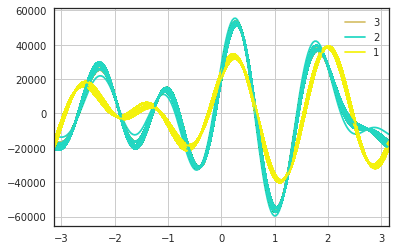

In [11]:
sns.set(style="white", color_codes=True)


bxg = pd.DataFrame(matrix_general)
# the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do

#print(bxg.head())

# Let's see how many examples we have of each species

print(matrix_general[0])

andrews_curves(bxg, 10)

plt.legend(loc='best')
plt.show()


# Coordenadas paralelas

      0   1   2    3   4   5      6      7     8      9   10   11   12
0      1   1   1   32   1   1  20032  20032  4096  20081   3  240  240
1      2   1   1   64  64   8  20032  20032  4096  20081   3  274  282
2      2   1   1   32   1   1  20032  20032  4096  20081   3  240  232
3      2   1   1   32   1   1  20032  20032    16  20042   2  240    6
4      1   1   1   32   1   1  20032  20032  2048  20042   2  240    6
5      2   1   1    1   2   2  20041  20041   128  20091   2  180  110
6      1   1   1   32   2   2  20041  20041   128  20082   3  180  168
7      2   1   1   32   2   2  20041  20041   128  20061   2  180   42
8      2   1   1   32   2   2  20041  20041   128  20092   3  180  178
9      2   1   1   32  64   8  20041  20041   128  20082   3  274  255
10     1   1   1    2  64   8  20041  20041   128  20061   2  274   68
11     2   1   1   32  64   8  20041  20041   128  20092   3  274  249
12     2   1   1   32  16  16  20041  20041   128  20092   2  244  156
13    

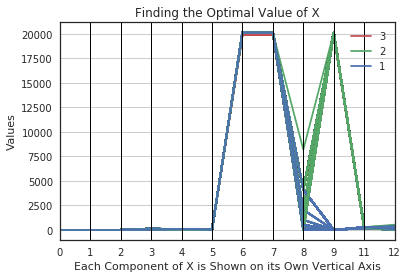

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

data = pd.DataFrame(matrix_general)
#data = pandas.read_csv(r'C:\Python27\Lib\site-packages\pandas\tests\data\iris.csv', sep=',')
data2 = data[[0,1,2,3,4,5,6,7,8,9,10,11,12]]
print(data2)
parallel_coordinates(data2, 10,color=['r','g','b'])
plt.xlabel("Each Component of X is Shown on its Own Vertical Axis")
plt.ylabel("Values")
plt.title("Finding the Optimal Value of X")
plt.show()

# PCA

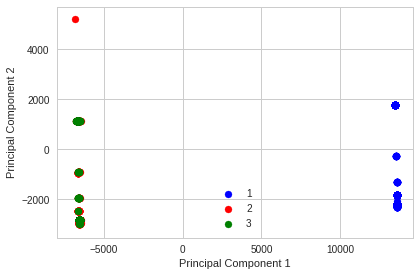

In [13]:
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import radviz
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.DataFrame(matrix_general)
# iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame

X_std = iris.ix[:,0:12].values
y = iris.ix[:,10].values
# Let's see how many examples we have of each species
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 2, 3),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


plt.show()

https://xaoquadrado.wordpress.com/2014/06/24/1161/

# Calculando a matriz de covariância

In [14]:
data = pd.DataFrame(matrix_general)
cov = data.cov()

In [15]:
cov

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.106683,-0.000627,-0.011703,-0.185114,-0.111091,-0.154341,-0.232263,-0.243718,2.842752e+01,6.077723e+01,0.001109,-0.236194,-0.419114
1,-0.000627,0.148269,0.132913,4.942613,0.159094,0.146010,2.246662,2.183092,5.255300e+01,-2.369975e+02,-0.027178,0.276771,-5.706084
2,-0.011703,0.132913,1.137236,5.679813,0.831925,1.408652,17.444370,17.359735,-7.111933e+01,-2.000166e+03,-0.152393,0.510834,-11.303045
3,-0.185114,4.942613,5.679813,1033.488640,10.226436,18.287873,34.462191,31.878906,2.391395e+03,7.116073e+03,-0.255894,-26.350980,-201.813881
4,-0.111091,0.159094,0.831925,10.226436,529.146735,90.096357,31.482086,26.282791,1.962310e+01,-2.237228e+04,-0.587759,457.374180,347.946370
5,-0.154341,0.146010,1.408652,18.287873,90.096357,102.672136,54.741145,53.517177,-3.403236e+02,-1.990694e+04,-0.966968,81.691112,74.458886
6,-0.232263,2.246662,17.444370,34.462191,31.482086,54.741145,1249.962683,1235.132056,-1.316993e+04,-1.832652e+05,-15.951939,28.705156,-1163.903181
7,-0.243718,2.183092,17.359735,31.878906,26.282791,53.517177,1235.132056,1245.789074,-1.324790e+04,-1.839330e+05,-15.977518,32.228917,-1118.535219
8,28.427517,52.553003,-71.119335,2391.394946,19.623098,-340.323636,-13169.933280,-13247.900062,3.357353e+06,2.791655e+06,222.690862,-396.523346,21283.666629
9,60.777226,-236.997512,-2000.166487,7116.072772,-22372.280408,-19906.938702,-183265.202924,-183932.994727,2.791655e+06,8.944697e+07,5966.660358,-30933.098571,48661.775402


In [16]:
# plt.imshow(cov, cmap='hot', interpolation='none')  
# plt.colorbar()  
# plt.xticks(range(len(cov)), cov.columns)  
# plt.yticks(range(len(cov)), cov.columns);  
# # plt.savefig("correl.png")  
# plt.show()  

In [17]:
corr = data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.004983,-0.033597,-0.017629,-0.014786,-0.046634,-0.020113,-0.021141,0.047500,0.019675,0.004582,-0.023683,-0.014714
1,-0.004983,1.000000,0.323681,0.399281,0.017961,0.037422,0.165031,0.160629,0.074486,-0.065078,-0.095259,0.023540,-0.169926
2,-0.033597,0.323681,1.000000,0.165675,0.033913,0.130362,0.462681,0.461207,-0.036397,-0.198316,-0.192867,0.015688,-0.121539
3,-0.017629,0.399281,0.165675,1.000000,0.013829,0.056142,0.030321,0.028095,0.040598,0.023405,-0.010743,-0.026845,-0.071985
4,-0.014786,0.017961,0.033913,0.013829,1.000000,0.386539,0.038710,0.032371,0.000466,-0.102835,-0.034485,0.651177,0.173448
5,-0.046634,0.037422,0.130362,0.056142,0.386539,1.000000,0.152806,0.149639,-0.018330,-0.207728,-0.128796,0.264037,0.084263
6,-0.020113,0.165031,0.462681,0.030321,0.038710,0.152806,1.000000,0.989789,-0.203300,-0.548086,-0.608952,0.026591,-0.377497
7,-0.021141,0.160629,0.461207,0.028095,0.032371,0.149639,0.989789,1.000000,-0.204845,-0.551004,-0.610949,0.029905,-0.363390
8,0.047500,0.074486,-0.036397,0.040598,0.000466,-0.018330,-0.203300,-0.204845,1.000000,0.161094,0.164029,-0.007087,0.133197
9,0.019675,-0.065078,-0.198316,0.023405,-0.102835,-0.207728,-0.548086,-0.551004,0.161094,1.000000,0.851464,-0.107116,0.059000


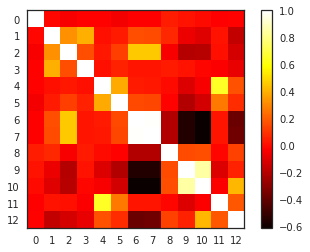

In [18]:
plt.imshow(corr, cmap='hot', interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);  
# plt.savefig("correl.png")  
plt.show()  

# Autovalores e Autovetores

autovalores da matriz de covariância representam a variância que será observada quando os dados originais forem projetados no eixo dado pelo autovetor correspondente. Um determinado autovalor informa a “variância explicada” (Explained Variance) pelo seu componente principal (autovetor) correspondente.

In [19]:
w,v=la.eig(cov)

autovalor

In [20]:
w

array([  8.95382021e+07,   3.26707506e+06,   7.85139243e+03,
         1.40926294e+03,   1.12878590e+03,   1.02317646e+03,
         2.35923132e+02,   8.06453877e+01,   1.24880957e+01,
         8.58975171e-01,   7.41797136e-02,   1.06037221e-01,
         1.10696111e-01])

autovetor

In [21]:
v

array([[  6.88715559e-07,   8.09341030e-06,   7.57353239e-05,
         -2.01723536e-04,  -9.29984450e-05,  -2.05673610e-04,
          9.72914595e-05,   1.43210350e-03,  -4.02793828e-04,
         -9.37109951e-03,  -3.66380594e-02,  -9.94817792e-01,
          9.43667078e-02],
       [ -2.62661884e-06,   1.84137774e-05,   8.27307329e-04,
          1.25430342e-03,   2.55356586e-04,   4.49048630e-03,
         -7.35878217e-04,   2.37111516e-04,  -1.60175823e-03,
          1.05119313e-01,   1.52088865e-01,   8.62701764e-02,
          9.78953887e-01],
       [ -2.23534698e-05,  -1.97110463e-06,   1.81189748e-03,
          1.12107324e-02,  -4.01884139e-03,   4.22296508e-03,
          8.43513104e-04,  -5.95490703e-03,  -3.88487763e-03,
          9.93934936e-01,   1.05078999e-02,  -1.98757177e-02,
         -1.06647412e-01],
       [  8.02961540e-05,   6.60811500e-04,   3.37089208e-02,
          6.79024864e-02,  -1.49514873e-03,   9.96372420e-01,
         -3.40128383e-02,   1.70271835e-02,   2.706

# Ordenação dos autovalores e seus autovetores correspondentes em ordem decrescente.

In [22]:
ind=np.argsort(w)[::-1]
w_dec=w[ind]
v_dec=v[ind]

In [23]:
w_dec

array([  8.95382021e+07,   3.26707506e+06,   7.85139243e+03,
         1.40926294e+03,   1.12878590e+03,   1.02317646e+03,
         2.35923132e+02,   8.06453877e+01,   1.24880957e+01,
         8.58975171e-01,   1.10696111e-01,   1.06037221e-01,
         7.41797136e-02])

In [24]:
v_dec

array([[  6.88715559e-07,   8.09341030e-06,   7.57353239e-05,
         -2.01723536e-04,  -9.29984450e-05,  -2.05673610e-04,
          9.72914595e-05,   1.43210350e-03,  -4.02793828e-04,
         -9.37109951e-03,  -3.66380594e-02,  -9.94817792e-01,
          9.43667078e-02],
       [ -2.62661884e-06,   1.84137774e-05,   8.27307329e-04,
          1.25430342e-03,   2.55356586e-04,   4.49048630e-03,
         -7.35878217e-04,   2.37111516e-04,  -1.60175823e-03,
          1.05119313e-01,   1.52088865e-01,   8.62701764e-02,
          9.78953887e-01],
       [ -2.23534698e-05,  -1.97110463e-06,   1.81189748e-03,
          1.12107324e-02,  -4.01884139e-03,   4.22296508e-03,
          8.43513104e-04,  -5.95490703e-03,  -3.88487763e-03,
          9.93934936e-01,   1.05078999e-02,  -1.98757177e-02,
         -1.06647412e-01],
       [  8.02961540e-05,   6.60811500e-04,   3.37089208e-02,
          6.79024864e-02,  -1.49514873e-03,   9.96372420e-01,
         -3.40128383e-02,   1.70271835e-02,   2.706

In [25]:
la.norm(v[0])

1.0000000000200691

In [26]:
la.norm(v[1])

0.99999999997723232

In [27]:
np.dot(v[0],v[1])

2.0404657130601578e-10

taxa de variância explicada 

In [28]:
EVR=w/np.sum(w)
EVR

array([  9.64674390e-01,   3.51990945e-02,   8.45900077e-05,
         1.51832384e-05,   1.21614107e-05,   1.10235866e-05,
         2.54180895e-06,   8.68864220e-07,   1.34545320e-07,
         9.25450065e-09,   7.99203785e-10,   1.14243294e-09,
         1.19262729e-09])